In [1]:
from npl.descriptors import ExtendedTopologicalFeaturesClassifier
from npl.calculators import TOPCalculator

calc = TOPCalculator('ETOP', stoichiometry='Pt151Cu50',
                     feature_classifier=ExtendedTopologicalFeaturesClassifier)

etop = calc.get_feature_classifier()

INFO - Loading top parameters of Pt151Cu50
INFO - Parameters obtained from reference: L. Vega Mater. Adv., 2021, 2, 6589-6602
INFO - Parameters loaded successfully
INFO - Parameters: 
{'CuPt': -25.0, 'Cu(cn=6)': 267.0, 'Cu(cn=7)': 342.0, 'Cu(cn=8)': 372.0, 'Cu(cn=9)': 372.0}


In [15]:
from npl.monte_carlo import run_monte_carlo
from npl.core import Nanoparticle

beta = 250
max_steps = 10000

energy_calculator = calc
feature_classifier = etop

energies_MC, steps_MC = [], []
for i in range(10):
    start_particle =  Nanoparticle()
    start_particle.truncated_octahedron(7, 2, {'Pt': 151, 'Cu': 50})
    best_particle, accepted_energies = run_monte_carlo(beta, max_steps,
                                                   start_particle,
                                                   energy_calculator,
                                                   feature_classifier)
    min_energy, min_step = min(accepted_energies, key=lambda x: x[0])
    energies_MC.append(min_energy)
    steps_MC.append(min_step)
    if min_energy <= min(energies_MC):
        global_minimum = best_particle

INFO - Starting Monte Carlo simulation
INFO - Beta: 250
INFO - Max steps: 10000
INFO - Starting energy: -550.000


INFO - Step: 2000
INFO - Lowest energy: -10050.0
INFO - Step: 4000
INFO - Lowest energy: -10250.0
INFO - Step: 6000
INFO - Lowest energy: -10300.0
INFO - Step: 8000
INFO - Lowest energy: -10300.0
INFO - Step: 10000
INFO - Lowest energy: -10300.0
INFO - Step: 12000
INFO - Lowest energy: -10300.0
INFO - Step: 14000
INFO - Lowest energy: -10300.0
INFO - Starting Monte Carlo simulation
INFO - Beta: 250
INFO - Max steps: 10000
INFO - Starting energy: 1672.000
INFO - Step: 2000
INFO - Lowest energy: -10150.0
INFO - Step: 4000
INFO - Lowest energy: -10250.0
INFO - Step: 6000
INFO - Lowest energy: -10250.0
INFO - Step: 8000
INFO - Lowest energy: -10300.0
INFO - Step: 10000
INFO - Lowest energy: -10300.0
INFO - Step: 12000
INFO - Lowest energy: -10300.0
INFO - Step: 14000
INFO - Lowest energy: -10300.0
INFO - Step: 16000
INFO - Lowest energy: -10300.0
INFO - Starting Monte Carlo simulation
INFO - Beta: 250
INFO - Max steps: 10000
INFO - Starting energy: 2442.000
INFO - Step: 2000
INFO - Lowest 

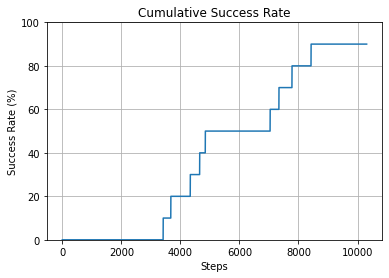

In [18]:
from npl.visualize import plot_cummulative_success_rate

plot_cummulative_success_rate(energies_MC, steps_MC)

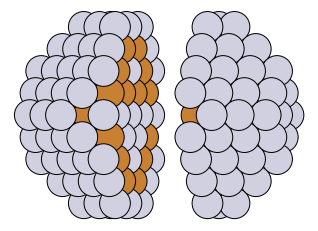

In [19]:
from npl.visualize import plot_parted_particle

plot_parted_particle(best_particle)

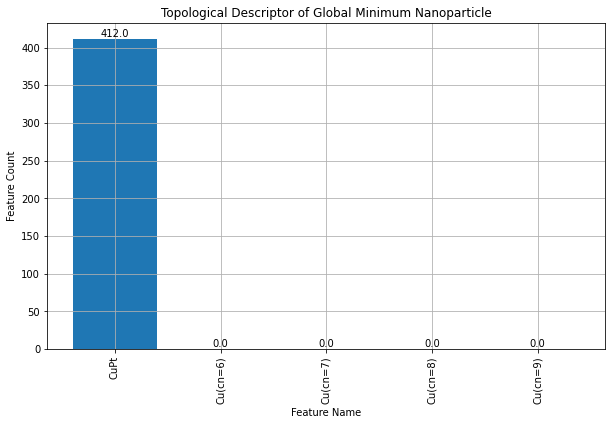

In [20]:
import matplotlib.pyplot as plt

threshold = 1e-16
filtered_indices = [i for i, coef in enumerate(calc.coefficients) if abs(coef) > threshold]
feature_names = feature_classifier.get_feature_labels()

feature_vector = best_particle.get_feature_vector(feature_classifier.get_feature_key())
filtered_feature_vector = [feature_vector[i] for i in filtered_indices]
filtered_feature_names = [feature_names[i] for i in filtered_indices]

# Plot the filtered feature vector
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_feature_names, filtered_feature_vector)
plt.xlabel('Feature Name')
plt.ylabel('Feature Count')
plt.title('Topological Descriptor of Global Minimum Nanoparticle')
plt.xticks(rotation=90)
plt.grid(True)

# Annotate bars with their heights
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()